##Two way ANOVAweek 6 assignment

##library and connections declaration

H0: The average heating bill are all same fro all heat type

H1: Atleast one heat type has different mean heating bill

In [ ]:
#Data Manipulation
import pandas as pd
import numpy as np
#statistical analysis
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#define connection to goggle drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
path = '/content/drive/MyDrive/BIA7042025/p18_19.xlsx'
df = pd.read_excel(path)


##summary and data processing

In [ ]:
df.rename(columns={'Heat Type':'HeatType'}, inplace=True)
df.rename(columns={'Home Type':'HomeType'}, inplace=True)
df.head()


,HeatType,HomeType,Bill
0,Electric,1,148.03
1,Electric,1,143.78
2,Electric,1,142.19
3,Electric,1,144.14
4,Electric,1,143.69


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HeatType  60 non-null     object 
 1   HomeType  60 non-null     int64  
 2   Bill      60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


,HomeType,Bill
count,60.000000,60.000000
mean,1.500000,138.555333
std,0.504219,6.997852
min,1.000000,122.600000
25%,1.000000,133.170000
50%,1.500000,139.630000
75%,2.000000,143.857500
max,2.000000,149.990000


#Describe of experiment

In [ ]:
#Frequency Table
crossT=pd.crosstab(df['HeatType'],df['HomeType'])
print(crossT)

HomeType   1   2
HeatType        
Electric  10  10
Gas       10  10
Oil       10  10


In [ ]:
#create a cross table with the average if the purchase value
crossT = pd.crosstab (df['HeatType'], df['HomeType'], values=df['Bill'], aggfunc='mean')
print(crossT)

HomeType        1        2
HeatType                  
Electric  143.868  146.684
Gas       132.390  130.339
Oil       137.419  140.632


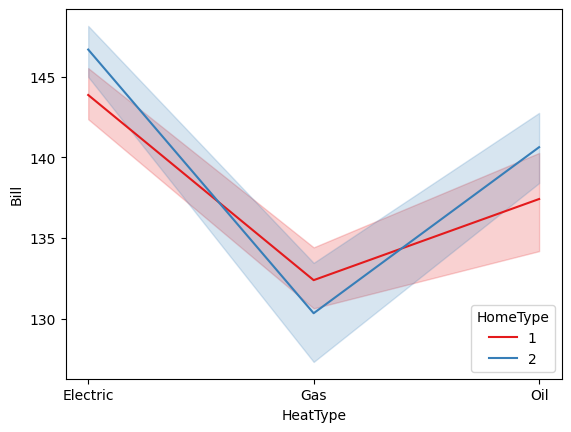

In [ ]:
#Draw line chart
sns.lineplot(x='HeatType', y='Bill', hue='HomeType', data=df, palette='Set1')
#plot Bill in 2 different colors by HomeType
#
#plot HomeType with different colors



plt.legend(title='HomeType', loc='lower right')
plt.xlabel('HeatType')
plt.ylabel('Bill')
#plt.show(


locs, labels=plt.xticks()
plt.xticks(locs, df['HeatType'].unique())
plt.show()



##ANOVA

In [ ]:
model=ols('Bill~C(HeatType)+C(HomeType)+C(HeatType):C(HomeType)',data=df).fit()
anova_table=sm.stats.anova_lm(model,typ=2)
print(anova_table)
alpha=0.1

                              sum_sq    df          F        PR(>F)
C(HeatType)              1941.930023   2.0  62.793177  8.114309e-15
C(HomeType)                26.374140   1.0   1.705639  1.970883e-01
C(HeatType):C(HomeType)    85.924990   2.0   2.778423  7.103557e-02
Residual                  834.996940  54.0        NaN           NaN


##Regression Analysis Model

In [ ]:
#liner regression analysis
lm_model=sm.OLS.from_formula('Bill ~ C(HeatType) + C(HomeType) + C(HeatType):C(HomeType)', data=df).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bill   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     26.57
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.93e-13
Time:                        22:44:36   Log-Likelihood:                -164.13
No. Observations:                  60   AIC:                             340.3
Df Residuals:                      54   BIC:                             352.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             143.8680      1.243    115.696      0.000     141.375     146.361
C(HeatType)[T.Gas]                    -11.4780      1.759     -6.527      0.000     -15.004      -7.952
C(HeatType)[T.Oil]                     -6.4490      1.759     -3.667      0.001      -9.975      -2.923
C(HomeType)[T.2]                        2.8160      1.759      1.601      0.115      -0.710       6.342
C(HeatType)[T.Gas]:C(HomeType)[T.2]    -4.8670      2.487     -1.957      0.056      -9.853       0.119
C(HeatType)[T.Oil]:C(HomeType)[T.2]     0.3970      2.487      0.160      0.874      -4.589       5.383
==============================================================================
Omnibus:                        3.906   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.941
Skew:                          -0.477   Prob(JB):                        0.230
Kurtosis:                       3.517   Cond. No.                         9.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""